# Agenda

- Homework-1 Submission

- Data science project life cycle

- Introduction of CRISP-DM and it's variants.

- Detailed discussion of components of the framework.

- Discussion of reproducibility.

- Applying first three steps of CRISP-DM with a demo.

If you get an extension for the hw, please fill-out the form below.

[HW-1 Submissions](https://forms.gle/efi2j4C39S1k2WXv7)

# CRISP-DM (Cross-Industry Standard Process for Data Mining )

<img src = "images/crisp_dm.png" width= 550 />

[Source](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)

__Variations of the Framework__

<img src = "images/think_like_ds.png" width= 550 />

Source: Think Like Data Scientist, p.20

<img src = "images/flow_of_ds_project.png" width= 750 />

[Source](https://towardsdatascience.com/life-cycle-of-a-data-science-project-3962b9670e5b)

Note that this is not necessarily the only frame work!

<img src = "images/asum_dm.png" width= 550 />

[Source](ftp://ftp.software.ibm.com/software/data/sw-library/services/ASUM.pdf)

__Objective of Such Framework__

- Quality of knowledge discovery project

- Reduce skills required 

- Reduce cost and time

__Benefits__

- General Purpose 

- Tool technique independent

- Supports documentation and capture experience for reuse.

- Support knowledge transfer and training.

__Phase and Tasks__

__Business Understanding__

- Background

- Objectives

- Success criteria

__Data Science Goals__

- DS goals

- DS success criteria

__Data understanding__

- Collect initial data

- Describe data

- Explore data

- Verify data quality

__Data Prep__

- Data set description

- Select data

- Clean data

- Construct data

- Integrate data

- Format data

__Modeling__

- Select modeling techniques
- Generate test design
- Build model
- Assess model

__Evaluation__

- Evaluate results
    - DS success 
    - Business success
    - Approved Models

- Review Process

- Next Steps


__Deployement__
- Plan Deployment 

- Plan Monitoring and Maintenance

- Produce final report 

- Final Presentation

- Review Process and documentation

[Source](https://s2.smu.edu/~mhd/8331f03/crisp.pdf)

__More in depth structure of Data Analysis__

    - Define a question
    - define the ideal data set
    - What data is available
    - Obtain the data
    - Clean the data
    - Exploratory analysis
    - Statistical Modeling 
    - Interpretation results
    - Challenge results
    - Write-up results
    - Create reproducible code

[Next part of the lecture is inspired from Coursera Course: Reproducible Research](https://www.coursera.org/learn/reproducible-research/home/welcome)

# Reproducibility: Science part of DS

<img src = "images/spectrum_of_reproducibility.png" width = 550 />

[Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3383002/)

__Replication__

- Results should be independent of people, material, tools, location, etc.

__Why not Replication then?__

- Big studies: Time, Money, Scale, Data, Unique (Covid?)

__Next Best Thing__

- Reproducibility: At least share the analytical data, code and documentation so that others can replicate the results.

- At least others can follow the logic and feel confident that there is no "tricks"

__Best Practices__

- Script Everything

- Record-document decision making steps.

- Start thinking about this at the beginning of the project - Planning

Let's see some of these things in action

For the next part of the lecture, we will be following: Hands-on Machine Learning with scikit-learn, Keras and TensorFlow chapter-2.

__Housing Data Project__

__Business Problem__
- MG Real Estate Company hired you. They want to understand whether it is worthwhile to invest a district or not in California.

- Let's discuss this problem a little bit.

<img src = "images/crisp_dm.png" width= 550 />

- Asking Context

- Asking bigger project

- Asking how this decision is made right now.

- Effectiveness of the current method

- DS goals 

- DS metrics

- Business metrics

- Success criteria

__Side Note__

- Usually the problem you are working will be a very small and particular part of a bigger problem.

- Make sure that you understand how your part of the work will be integrated to the bigger project.

- Defining a well-defined, specific question is the most important dimension reduction technique!

__Dataset__

- Let's Discuss this part

<img src = "images/crisp_dm.png" width= 550 />

- Ideal dataset - Descriptive

- Available dataset 

- Access to the dataset - Buying - Collecting - Generate - term of use?

- Format of the dataset

In [69]:
 # Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Common imports
import numpy as np
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [71]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()

__Loading Data from Script__

Demo

In [67]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [68]:
housing = load_housing_data()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


__Explore and Validate Data__

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [59]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [60]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Saving figure attribute_histogram_plots


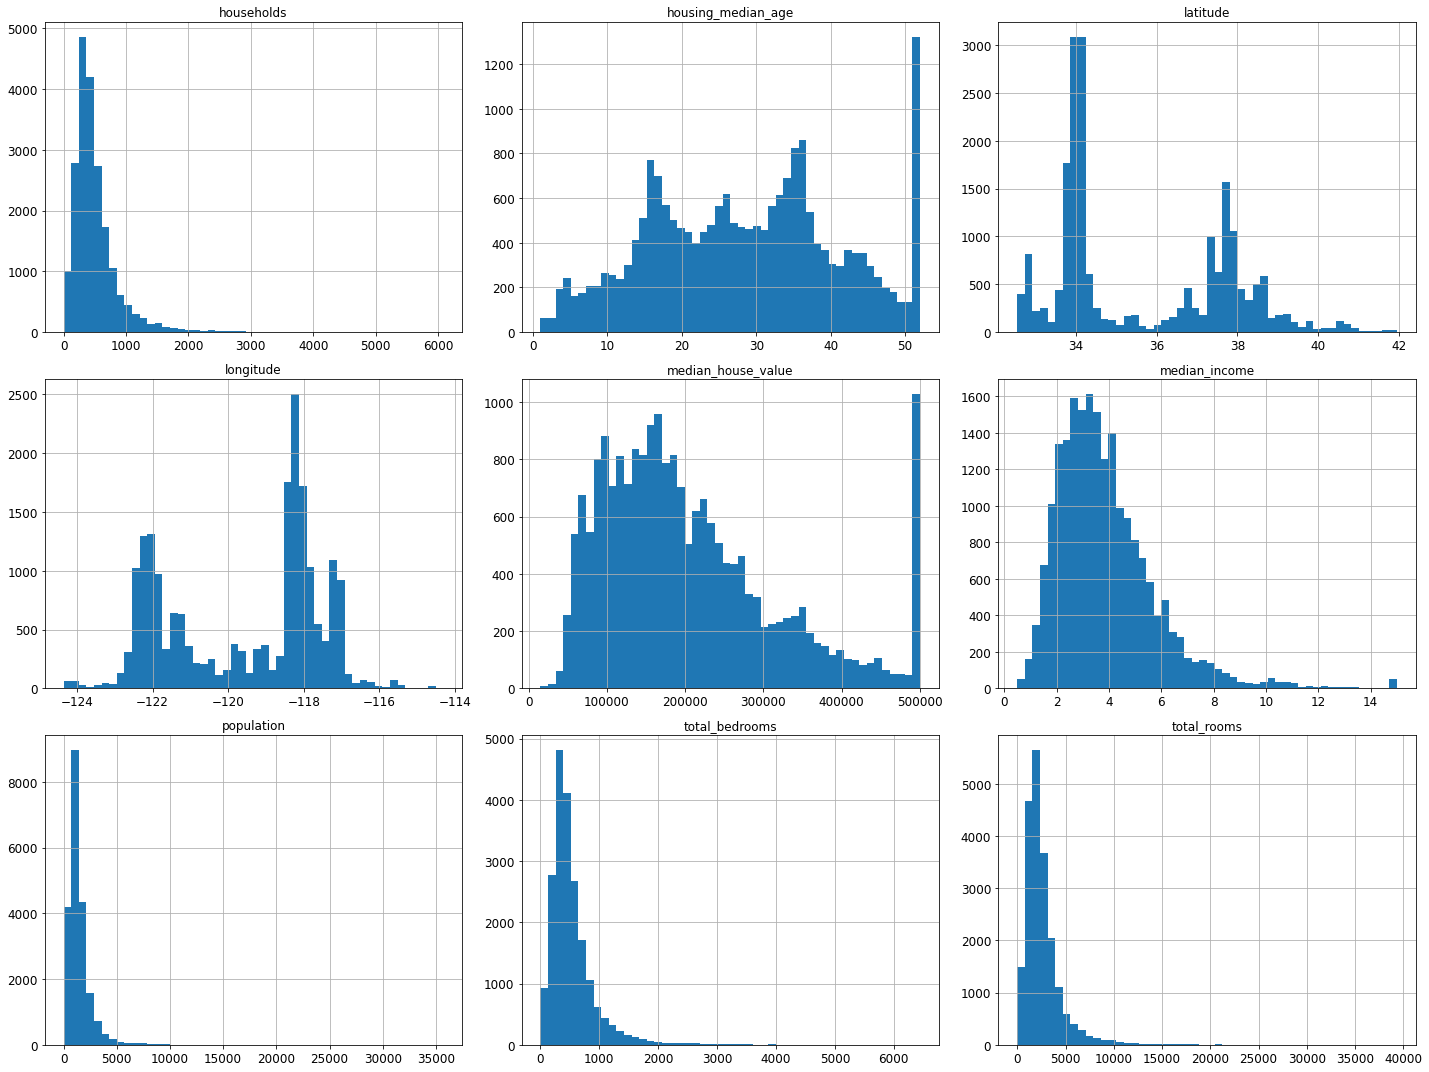

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

- Note that median income is capped

- Note that median age and median house value is capped. Do you see a problem?

- Note the distributions.

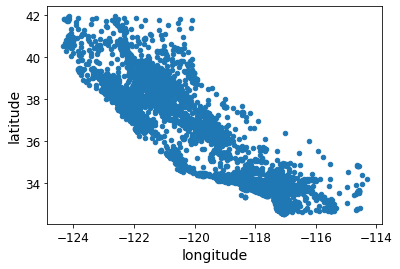

In [72]:
housing.plot(kind="scatter", x="longitude", y="latitude")

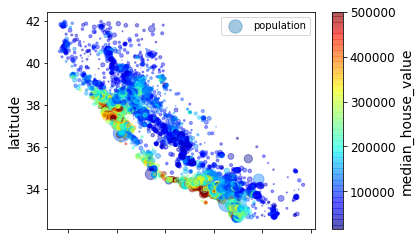

In [63]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100,
             label="population", c="median_house_value", 
             cmap=plt.get_cmap("jet"), colorbar=True,) 
plt.legend()
plt.draw()

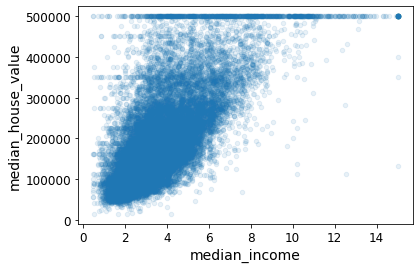

In [64]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

plt.draw()

Review

## Extra Resources

[Dan Meyer - Ted Talk](https://www.ted.com/talks/dan_meyer_math_class_needs_a_makeover#t-3495)

[Hands-On ML with Sklearn, Keras and TF 2nd edition](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)